### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [126]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

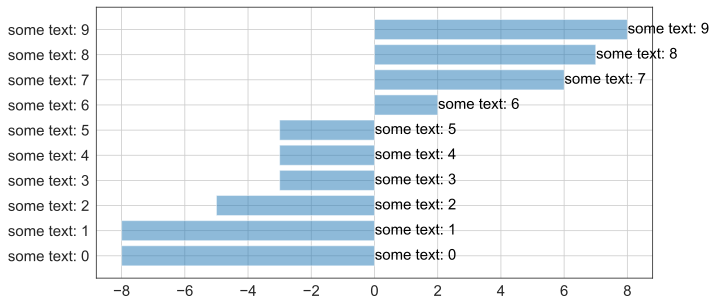

In [127]:
#заготовка без функции, просто отрисовка:

bars_length = np.random.randint(-10,10,10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]

plt.figure(figsize=(10,5)) #
plt.barh(labels, bars_length, alpha=0.5) 

ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
for i in range(len(bars_length)):
    if bars_length[i]>0:
        ax.text(bars_length[i] + 0.01, i, labels[i],color='black',va='center', fontsize=15)
    else: ax.text(0.01, i, labels[i],color='black',va='center', fontsize=15)

plt.grid(True)
plt.show()
#plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)



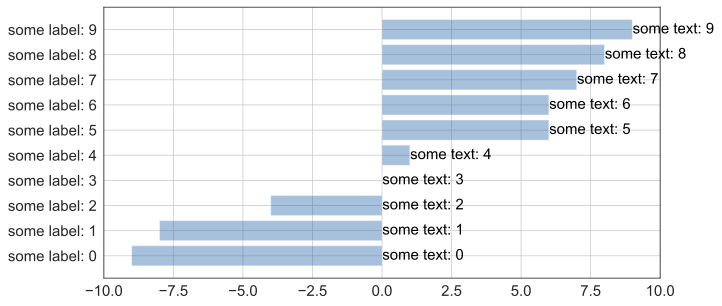

In [128]:
# с функцией

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
        
    fig, ax = plt.subplots() #фигура и объекты осей
    fig.set_figwidth(figsize[0]) #задаем ширину и высоту
    fig.set_figheight(figsize[1])

    y_pos = np.arange(len(yticks_labels)) #подписи ось у
    draw = ax.barh( y_pos, bars_length,  color = '#2563A5', tick_label = yticks_labels, alpha=0.4) #рисуем график
    ax.set_xlim(-10,10) #задаем ширину по оси х
    
    ax = plt.gca() #надписи вдоль оси у
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)  

       
    for i in range(len(bars_length)):#вставляем надписи к шкалам по циклу:
        if bars_length[i]>0:
            ax.text(bars_length[i] + 0.01, i, labels[i], color = "black", va="center", fontsize=15)
        else: ax.text(0.01, i, labels[i], color = "black", va="center", fontsize=15)
        
    plt.grid(True)
    plt.show()
    
# Сигнатура функции и пример вывода:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (10, 5)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [129]:
#dti

In [130]:
#probabilities_in_time

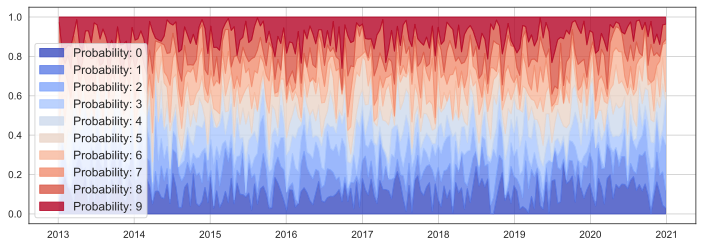

In [131]:
def plot_time_probabilities(probabilities_in_time, figsize):
    
    n = len(probabilities_in_time.columns)
    cmap = plt.cm.coolwarm(np.linspace(0, 1, n))#строим тепловую карту от 0 до1, разбитую на n отрезков
    
    fig = plt.figure()
    ax = fig.add_subplot(111)#параметры сетки подзаголовков, закодированные в виде одного целого числа(1x1grid,first subplot)
    fig.set_figwidth(figsize[0])#ширина (figsize принимает кортеж ширины графика в дюймах?)
    fig.set_figheight(figsize[1])#высота
    
    for i in range(num):#устанавливаем нижний цвет, на его границу - верхний цвет
        lower_topic = probabilities_in_time.loc[:, 0:i-1].sum(axis=1) 
        upper_topic = lower_topic + probabilities_in_time[i]
        plt.fill_between(probabilities_in_time.index, lower_topic, upper_topic,
                         color=cmap[i], label='Probability: {}'.format(i), alpha=0.8) # заполняем цветом простр-во между линиями
        lower_topic = upper_topic #нижний становится верхним и все повторяется в цикле

        plt.legend(prop={'size': 16})
        
    plt.legend(prop={'size': 12}, loc = 3)   # 3 - расположение легенды в нижнем левом углу
    plt.grid(True)#сетка
    plt.show()
    
# Заданная сигнатура функции:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W') # даты от и до с интервалом 2 недели
probabilities_in_time = np.random.random((10, len(dti))) # массив случайных чисел из интервала
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T #строим датафрейм
probabilities_in_time.index = dti
figsize = (12, 4)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

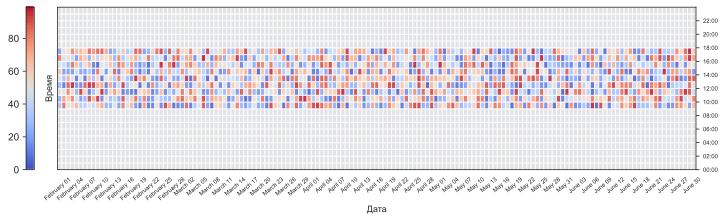

In [124]:
# Сигнатура функции и пример вывода:

def plot_intraday_ts(intraday_ts, figsize):
    
    intraday_ts = intraday_ts[:(len(intraday_ts)//24)*24] #колво элементов без остатка - делится на сутки
    a = np.array(intraday_ts.values).reshape(-1, 24) #формируем массив - -1 строки неизвестны,он подберет сам
    intraday_ts = pd.DataFrame(a, index = np.unique(intraday_ts.index.date), columns = np.unique(intraday_ts.index.time))
    intraday_ts = intraday_ts.T #придаем датафрейму форму таблицы
    intraday_ts = intraday_ts.fillna(intraday_ts.mean().mean())#заполняем NAN средними значениями 
    
    num = len(intraday_ts) #вводим новую переменную
    cm = plt.cm.coolwarm #строим тепловую карту
    fig, ax = plt.subplots()#задаем график с размерами 
    fig.set_figwidth(figsize[0]) 
    fig.set_figheight(figsize[1])
    
    broad = ax.pcolormesh(intraday_ts, edgecolors = 'white', cmap = cm, alpha = 0.8)#отображает границу между ячейками pcolormesh

    plt.ylabel('Время', fontsize=9)#подписи по шкалам
    plt.xlabel('Дата', fontsize=9)
    
    ax.set_xticks(range(0, len(intraday_ts.columns), 3)) #названия по оси х , rotation - угол наклона
    ax.set_xticklabels([intraday_ts.columns[i].strftime('%B %d') for i in range(0,len(intraday_ts.columns), 3)], rotation=40, fontsize = 6)
    ax.set_yticks(range(0, len(intraday_ts.index), 2))#названия по оси y 
    ax.set_yticklabels([intraday_ts.index[i].strftime('%H:%M') for i in range(0, len(intraday_ts.index), 2)], fontsize = 6 )
    ax.yaxis.set_ticks_position('right') #надписи времени справа
    
    col_bar = plt.colorbar(broad,ax=[ax],location='left', pad = 0.03) # шкала слева
    plt.show()

# Сигнатура функции и пример вывода:    

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 17)] = np.nan # оставляем время с 9 до 18
plot_intraday_ts(intraday_ts, figsize)

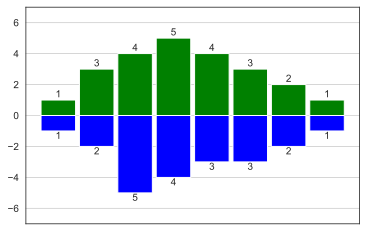

In [57]:
#это к заданию не относится... просто оставила себе на память, потом не вспомню как это делать...
x0 = np.arange(8)
y1 = np.array([1,3,4,5,4,3,2,1])
y2 = np.array([1,2,5,4,3,3,2,1])
plt.ylim(-7,7)
plt.bar(x0,y1,0.9, facecolor='g')
plt.bar(x0,-y2,0.9,facecolor='b')
plt.xticks(())
plt.grid(True)
for x, y in zip(x0, y1):
    plt.text(x, y + 0.05, '%d' % y, ha='center', va = 'bottom')
for x, y in zip(x0, y2):
    plt.text(x, -y - 0.05, '%d' % y, ha='center', va = 'top')
plt.show()

